# K Nearest Neighbors On Classified Dataset

In [142]:
#importing the necessary libraries

In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [144]:
#importing the dataset
df = pd.read_csv('Classified Data', index_col=0)

In [145]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


Let's plot a pairplot with the help of seaborn

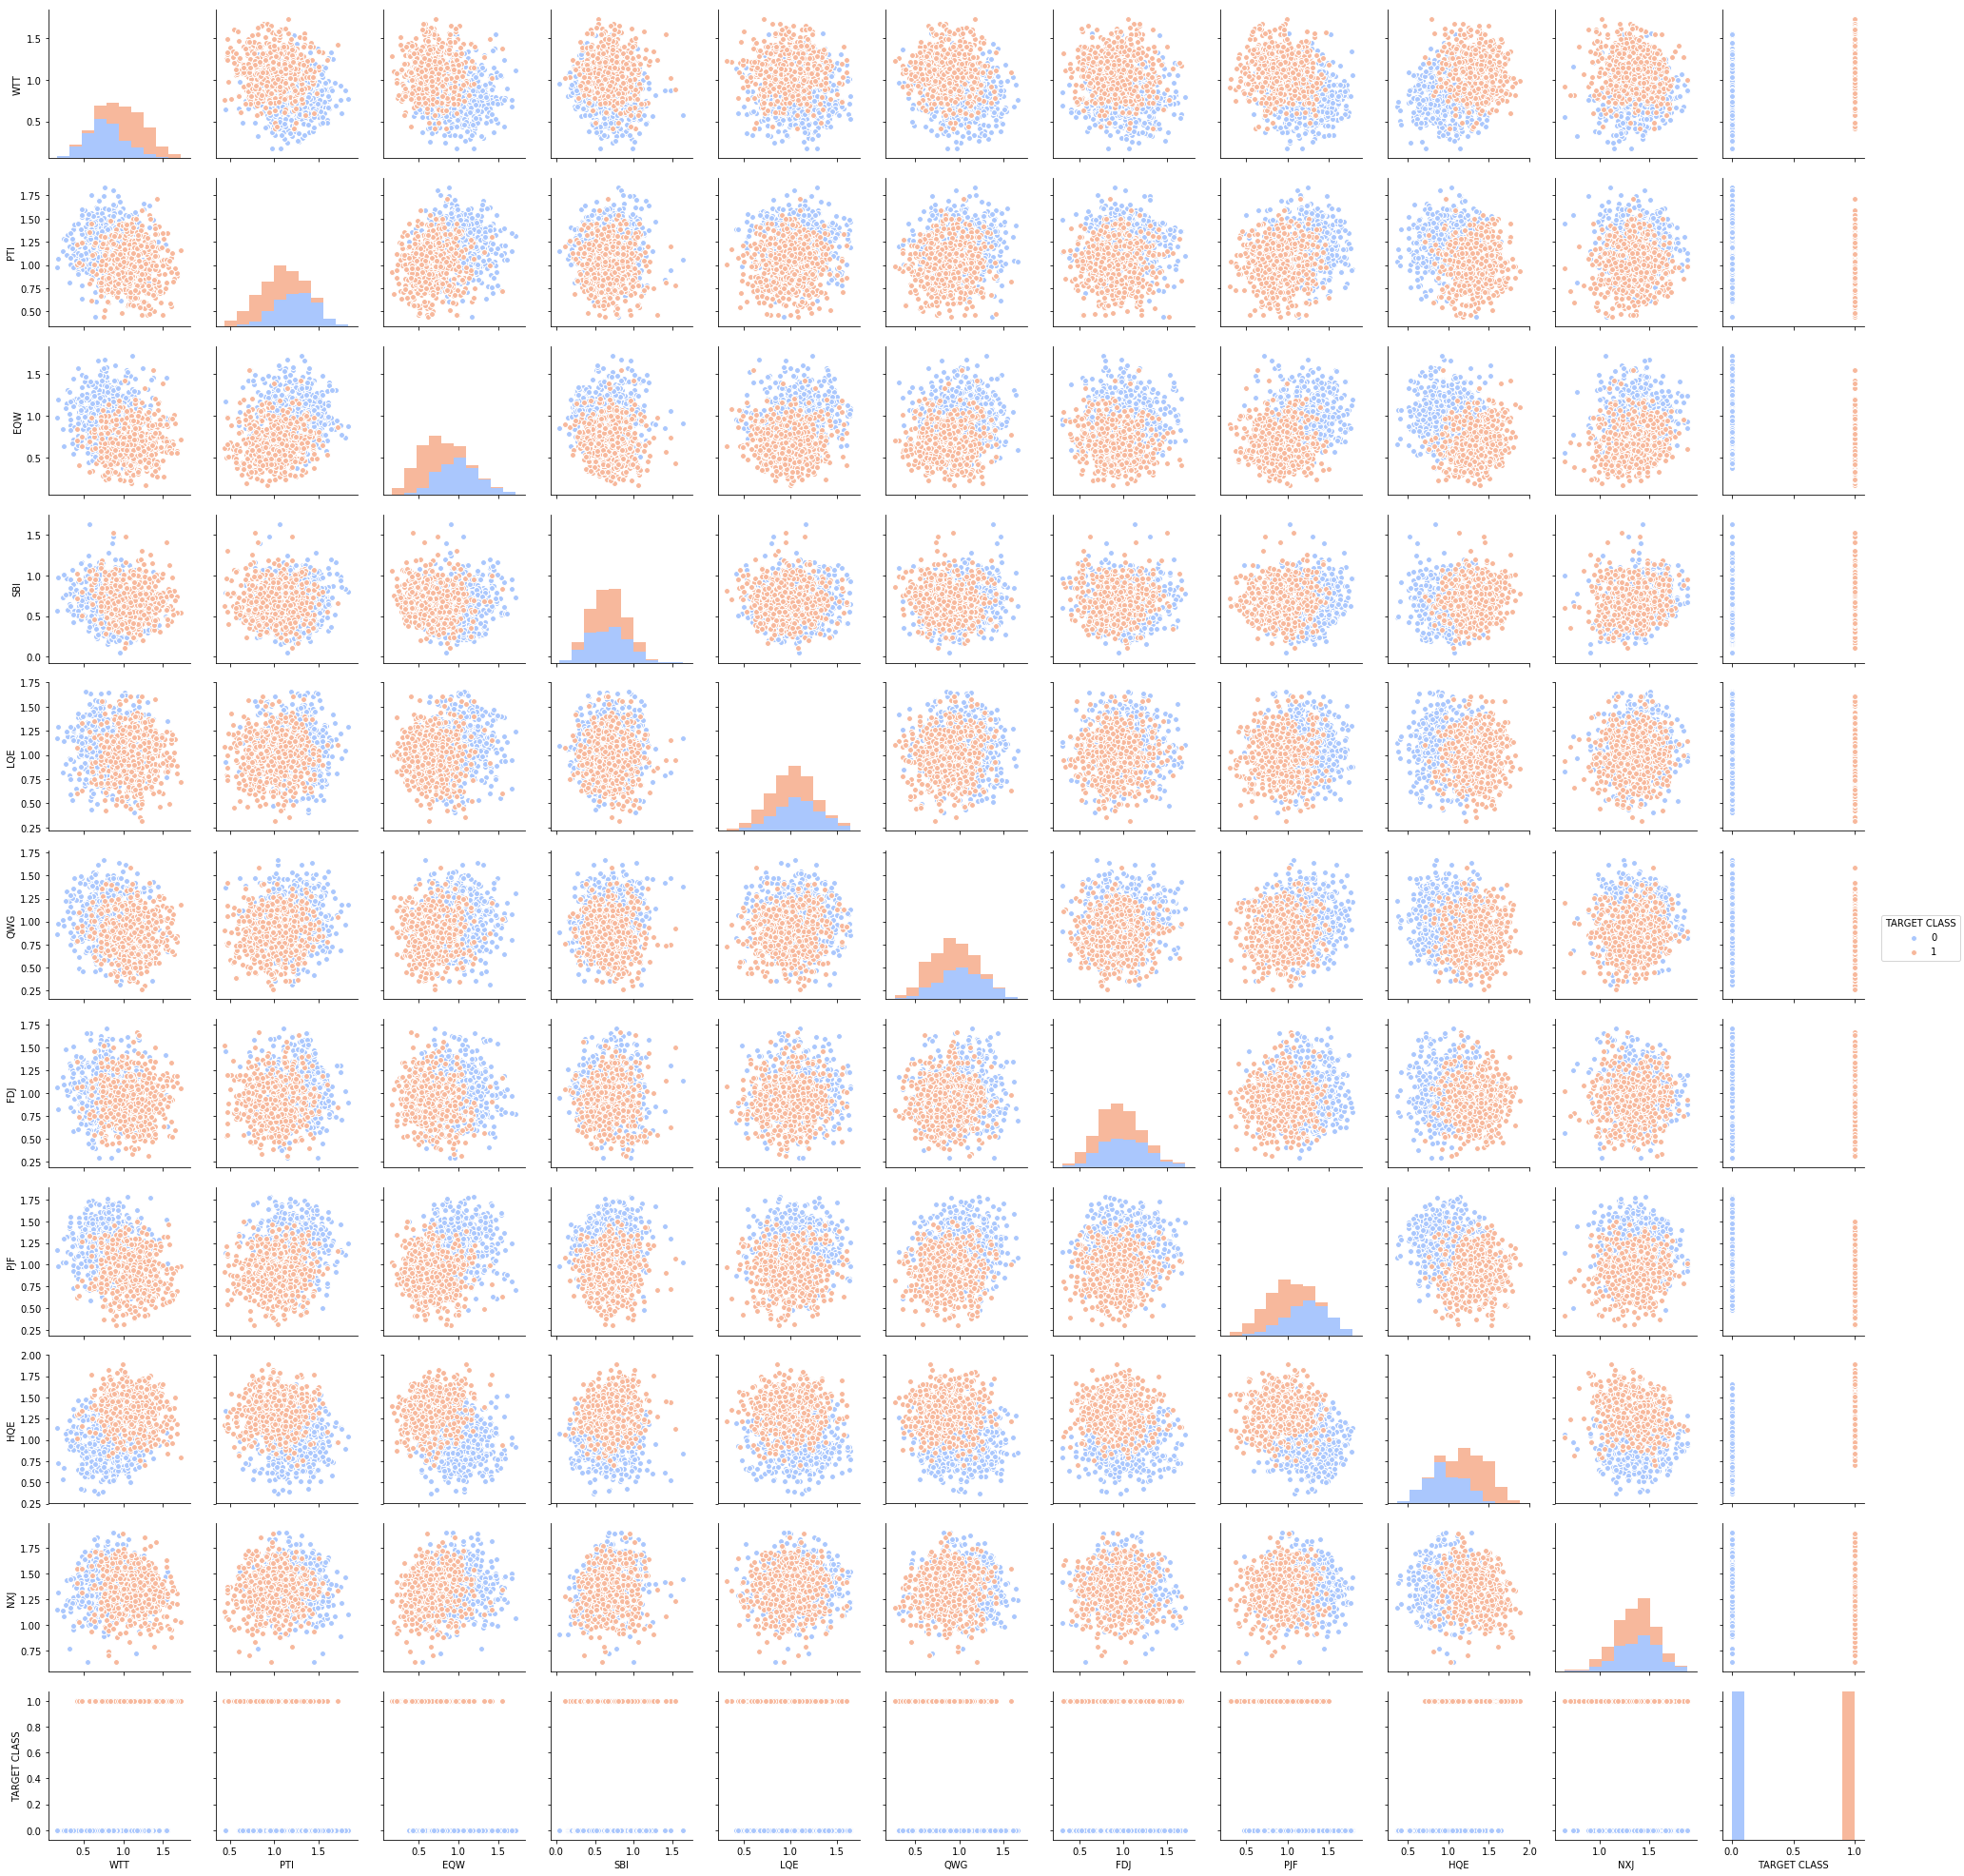

In [146]:
sns.pairplot(data = df, hue= 'TARGET CLASS', palette='coolwarm')

## Standardizing The Variables

In [147]:
from sklearn.preprocessing import StandardScaler

In [148]:
scaler = StandardScaler()

In [149]:
scaler.fit(df.drop('TARGET CLASS', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [150]:
scaled_feature = scaler.transform(df.drop('TARGET CLASS', axis = 1))

In [151]:
dataset = pd.DataFrame(scaled_feature, columns=df.columns[:-1])
dataset.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


## Train Test Split

In [152]:
from sklearn.model_selection import train_test_split

In [153]:
X_train, X_test, y_train, y_test = train_test_split(scaled_feature,df['TARGET CLASS'],
                                                    test_size=0.30)

## Building KNN model

In [154]:
from sklearn.neighbors import KNeighborsClassifier

In [155]:
classifier = KNeighborsClassifier()

In [156]:
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [157]:
pred = classifier.predict(X_test)

## Evaluation

In [158]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [159]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.93      0.92      0.92       144
          1       0.92      0.94      0.93       156

avg / total       0.93      0.93      0.93       300



In [160]:
print(confusion_matrix(y_test,pred))

[[132  12]
 [ 10 146]]


In [161]:
print(accuracy_score(y_test,pred))

0.926666666667


Nice accuracy. Let's see if we can increase it further by playing with number of nearest neighbors

## Choosing K Value

Let's use the elbow method

In [162]:
error_rate = []

for i in range(1,40):
    
    classifier = KNeighborsClassifier(n_neighbors= i)
    classifier.fit(X_train,y_train)
    pred_i = classifier.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

In [163]:
error_rate

[0.08666666666666667,
 0.096666666666666665,
 0.073333333333333334,
 0.076666666666666661,
 0.073333333333333334,
 0.073333333333333334,
 0.070000000000000007,
 0.070000000000000007,
 0.070000000000000007,
 0.076666666666666661,
 0.083333333333333329,
 0.080000000000000002,
 0.076666666666666661,
 0.070000000000000007,
 0.070000000000000007,
 0.070000000000000007,
 0.066666666666666666,
 0.070000000000000007,
 0.073333333333333334,
 0.070000000000000007,
 0.066666666666666666,
 0.063333333333333339,
 0.063333333333333339,
 0.059999999999999998,
 0.063333333333333339,
 0.063333333333333339,
 0.063333333333333339,
 0.063333333333333339,
 0.063333333333333339,
 0.059999999999999998,
 0.066666666666666666,
 0.066666666666666666,
 0.066666666666666666,
 0.066666666666666666,
 0.070000000000000007,
 0.063333333333333339,
 0.066666666666666666,
 0.059999999999999998,
 0.063333333333333339]

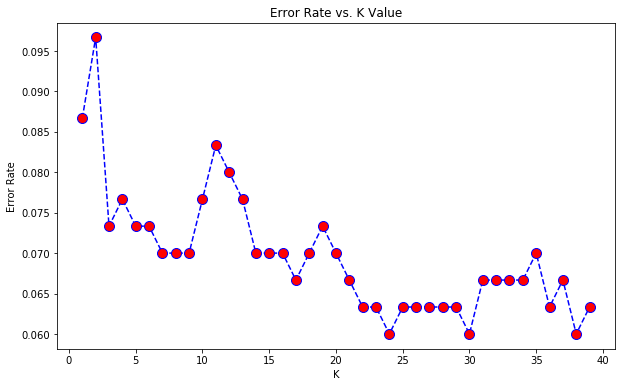

In [164]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

At K>24, the error rate keeps oscillating b/w 0.6 and 0.7

In [167]:
#Let's retrain the model with k=24

classifier = KNeighborsClassifier(n_neighbors=24)
classifier.fit(X_train,y_train)
pred = classifier.predict(X_test)

print('K=24')
print('\n')
print(classification_report(y_test,pred))
print(confusion_matrix(y_test, pred))
print(accuracy_score(y_test,pred))

K=24


             precision    recall  f1-score   support

          0       0.94      0.93      0.94       144
          1       0.94      0.95      0.94       156

avg / total       0.94      0.94      0.94       300

[[134  10]
 [  8 148]]
0.94


An accuracy of 94%. Good Job!